In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r maker_passes
%store -r jacobs_ethnicities

In [3]:
# stacked bar plot: DESINV Course Enrollment Numbers by Ethnicity and Year
'''
graph_data = jacobs_ethnicities.groupby(['year.name','Ethnicity'], sort=False).count().unstack()['ppsk']
graph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')
'''

"\ngraph_data = jacobs_ethnicities.groupby(['year.name','Ethnicity'], sort=False).count().unstack()['ppsk']\ngraph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')\n"

In [4]:
maker_passes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders
0,724096,2015,Fall,Y,Y,Y
1,687168,2015,Fall,N,Y,Y
3,781707,2015,Fall,N,N,Y
5,895798,2015,Fall,N,N,Y
8,857674,2015,Fall,N,N,Y
...,...,...,...,...,...,...
16329,4364634,2020,Fall,N,N,Y
16330,4364856,2020,Fall,N,Y,N
16331,4365425,2020,Fall,N,Y,N
16332,4365890,2020,Fall,N,N,Y


In [5]:
'''
fall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)
fall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])
fall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')
'''

"\nfall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)\nfall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])\nfall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')\n"

In [6]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [7]:
undergrads = jacobs_ethnicities[jacobs_ethnicities["undergrad.status"] == 'Undergraduate']
first_courses = undergrads.groupby('ppsk', sort=False).first()
first_courses = first_courses.merge(student_majors[['ppsk','major']], on='ppsk')
# comparison to see first and last majors for any given student
#last_courses = undergrads.groupby('ppsk', sort=False).last()
#first_courses.merge(last_courses['year.name'], on='ppsk', how = 'left')[['year.name_x','year.name_y']]#.duplicated()

In [8]:
first_courses

,ppsk,year.name,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity,major
0,2416548,2015 Spring,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Mechanical Engineering
1,2416548,2015 Spring,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Mechanical Engineering
2,2418167,2015 Spring,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Political Economy
3,2415660,2015 Spring,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,B,Letter Grade,B,3.0,2.0,Asian/Pacific Islander,Cognitive Science
4,2415660,2015 Spring,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,B,Letter Grade,B,3.0,2.0,Asian/Pacific Islander,Letters & Sci Undeclared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,2741518,2019 Fall,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Economics
4852,2741518,2019 Fall,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Letters & Sci Undeclared
4853,2741518,2019 Fall,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Economics
4854,2741518,2019 Fall,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Economics


In [91]:
test = pd.DataFrame()

In [92]:
test['Total'] = first_courses.groupby(['major','Ethnicity']).count().unstack()['ppsk'].fillna(0).drop('Unknown',axis=1).sum(axis=1)#.sort_values('Underrepresented Minority', ascending = False)

In [95]:
test.sort_values(by='Total',ascending = False)

,Total
major,
Cognitive Science,418.0
L&S Computer Science,339.0
Letters & Sci Undeclared,299.0
Electrical Eng & Comp Sci,194.0
Mechanical Engineering,184.0
...,...
Astrophysics,1.0
South & SE Asian Studies,1.0
Native American Studies,1.0


In [90]:
first_courses.groupby(['major','Ethnicity']).count().unstack()['ppsk'].fillna(0).sort_values('Underrepresented Minority', ascending = False)

Ethnicity,Asian/Pacific Islander,International,Underrepresented Minority,Unknown,White/Other
major,,,,,
Mechanical Engineering,72.0,20.0,36.0,150.0,56.0
Cognitive Science,277.0,41.0,35.0,73.0,65.0
Letters & Sci Undeclared,164.0,26.0,29.0,525.0,80.0
L&S Computer Science,242.0,36.0,12.0,66.0,49.0
Art,11.0,3.0,10.0,23.0,9.0
...,...,...,...,...,...
Eng Math & Statistics,1.0,0.0,0.0,0.0,3.0
MSE/ME Joint Major,1.0,0.0,0.0,0.0,0.0
MSE/NE Joint Major,3.0,0.0,0.0,0.0,0.0


In [89]:
test.sort_values(by='Total',ascending=False).head(6)

,Total
major,
Letters & Sci Undeclared,824.0
Cognitive Science,491.0
L&S Computer Science,405.0
Electrical Eng & Comp Sci,384.0
Mechanical Engineering,334.0
Industrial Eng & Ops Rsch,300.0


In [113]:
index = ['Electrical Eng & Comp Sci', 'Letters & Sci Undeclared', 'L&S Computer Science', 'Cognitive Science', 'Mechanical Engineering', 'Art']
graphing = first_courses.groupby(['major','Ethnicity']).count().unstack()['ppsk'].fillna(0)
graphing = graphing[graphing.index.isin(index)].reindex(index)
graphing.drop('Unknown',axis=1,inplace=True)

In [114]:
graphing['Total'] = graphing.sum(axis=1)

In [115]:
graphing

Ethnicity,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,Total
major,,,,,
Electrical Eng & Comp Sci,133.0,29.0,5.0,27.0,194.0
Letters & Sci Undeclared,164.0,26.0,29.0,80.0,299.0
L&S Computer Science,242.0,36.0,12.0,49.0,339.0
Cognitive Science,277.0,41.0,35.0,65.0,418.0
Mechanical Engineering,72.0,20.0,36.0,56.0,184.0
Art,11.0,3.0,10.0,9.0,33.0


In [116]:
graphing = graphing.sort_values(by='Total', ascending = False).drop('Total',axis=1)

Text(0.5, 0, 'Number of Students')

<Figure size 432x288 with 0 Axes>

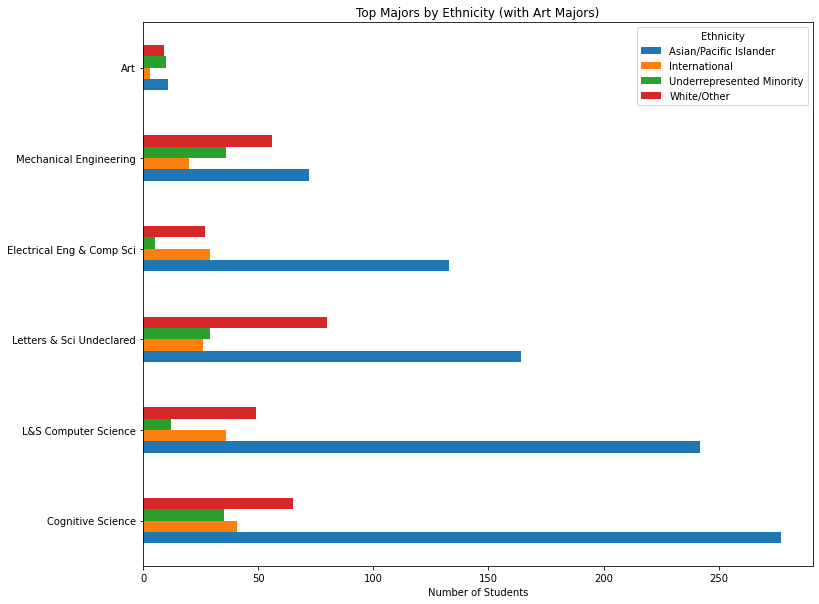

In [123]:
plt.figure()
graphing.plot(kind = 'barh',figsize=(12,10), title='Top Majors by Ethnicity (with Art Majors)')
plt.ylabel('')
plt.xlabel('Number of Students')